In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:

path = os.getcwd() + '\\Analise e Tratamento\\Dados\\'
df = pd.read_csv(path + 'housing.csv', sep =',' , encoding = 'iso-8859-1')

In [4]:
x = df.iloc[:, 0:1].values
y = df.iloc[:, 3].values

#Pré Processamento
#Transforma x elevado a três potências [[x^0, x^1, x^2], ...], logo os coeficientes gerados para polinômio de grau 2.
grau_polinomial = PolynomialFeatures(degree=2)
x_poly = grau_polinomial.fit_transform(x)
x_poly

array([[ 1.      ,  6.575   , 43.230625],
       [ 1.      ,  6.421   , 41.229241],
       [ 1.      ,  7.185   , 51.624225],
       ...,
       [ 1.      ,  6.976   , 48.664576],
       [ 1.      ,  6.794   , 46.158436],
       [ 1.      ,  6.03    , 36.3609  ]])

In [5]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_poly, y, test_size = 0.3, random_state = 0)

In [6]:
# Ajuste de y aos três valores de x -> [x^0, x^1, x^2]
polinomial = LinearRegression()
polinomial.fit(x_treino, y_treino)

LinearRegression()

In [7]:
#Coeficiente Linear
polinomial.intercept_

1640107.0085836346

In [8]:
#Cada coluna de x_treino_poly recebe um coeficiente angular (x constante = 1, coeficiente angular = 0)
polinomial.coef_

array([      0.        , -568528.11104731,   60092.59048475])

In [9]:
#Equação da regressão polinomial: 1640107 - 568528,11*RM + 60092,59*RM^2

In [10]:
#Criando valores de x para plotar o gráfico
numeros = np.linspace(3, 8.5, 342) #De 3 a 8.5, dividido entre 342 valores distintos (quantidade de variáveis treino)

In [11]:
#Curva da regressão polinomial
valores = 1640107.37 - 568528.11 * numeros + 60092.59*numeros**2

In [12]:
#RETA DE REGRESSÃO

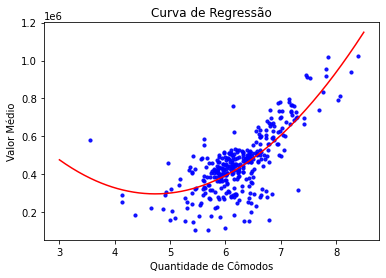

In [13]:
#Comparando a reta com dados de treino
plt.scatter(y = y_treino, x = x_treino[:,1], color='blue', s=10, alpha = 0.9)
plt.plot(numeros, valores, color = 'r')
plt.title('Curva de Regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [14]:
#Curva da regressão polinomial
numeros2 = np.linspace(3,8.5, 147)
valores2 = 1640107.37 - 568528.11 * numeros2 + 60092.59*numeros2**2

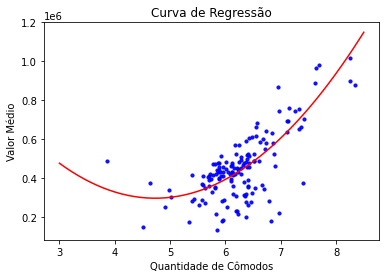

In [15]:
#Comparando a reta com dados de teste
plt.scatter(y = y_teste, x = x_teste[:,1], color='blue', s=10, alpha = 0.9)
plt.plot(numeros2, valores2, color = 'r')
plt.title('Curva de Regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [16]:
#Fazendo a predição usando os coeficientes
numero_de_comodos = 9
predicao_valor = 1640107.37 - 568528.11 * numero_de_comodos + 60092.59 * numero_de_comodos**2
predicao_valor

1390854.17

In [17]:
#Fazendo a predição com o modelo (9 cômodos)
predicao_valor2 = polinomial.predict([[1, 9, 81]]) #[[x^0, x^1, x^2]]
predicao_valor2

array([1390853.83842276])

In [18]:
#Coefiente de determinação r^2
polinomial.score(x_treino, y_treino)

0.5864656525780778

In [19]:
#Coefiente de determinação  com dados de teste r^2
polinomial.score(x_teste, y_teste)

0.5391879530755569

In [20]:
previsoes = polinomial.predict(x_teste)

In [21]:
#MÉTRICAS DE DESEMPENHO

In [22]:
#Erro absoluto médio
abs(y_teste - previsoes).mean()

87371.99750807838

In [23]:
mean_absolute_error(y_teste, previsoes)

87371.99750807838

In [24]:
#Erro quadrático médio
mse = mean_squared_error(y_teste, previsoes)
mse

13369963676.41549

In [25]:
#Raiz do erro quadrático médio
rmse = np.sqrt(mse)
rmse

115628.55908647954

In [26]:
#VALIDAÇÃO CRUZADA

In [27]:
kfold = KFold(n_splits = 15, shuffle = True, random_state = 5)
modelo = LinearRegression()
resultado = cross_val_score(modelo, x_poly, y, cv = kfold)
print('Coeficiente de Determinação Médio - r^2: %.2f%%' % (resultado.mean() * 100))

Coeficiente de Determinação Médio - r^2: 53.32%
